In [2]:
import tensorflow as tf

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
print(f"{x_train.shape}, {y_train.shape}")
print(f"{x_test.shape}, {y_test.shape}")

(60000, 28, 28), (60000,)
(10000, 28, 28), (10000,)


In [6]:
x_train_scale = x_train / 255.0
x_test_scale = x_test / 255.0

In [ ]:
# to_categorical : 원 핫 인코딩 으로 만듬 [0, 0, 0] 같은 형태로 만든다.
# 원 핫 인코딩 : 증가하는 숫자 값이 아니라 그냥 각각의 클래스로 인식해라

y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [8]:
optimizer_list = [SGD(), Adagrad(), RMSprop(), SGD(momentum=0.9), Adam()]

In [11]:
result_list = list()

# to_categorical을 사용할 경우에는 categorical_crossentropy로 사용해야 한다.

for optimizer in optimizer_list:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(8, activation=tf.nn.relu))
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dense(32, activation=tf.nn.relu))
    model.add(Dense(10, activation=tf.nn.softmax))

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])

    result = model.fit(x_train_scale, y_train_cate, epochs=5) 
    result_list.append(result)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - acc: 0.5008 - loss: 1.3509
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - acc: 0.7862 - loss: 0.6031
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - acc: 0.8160 - loss: 0.5272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - acc: 0.8229 - loss: 0.4906
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - acc: 0.8356 - loss: 0.4635
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - acc: 0.2443 - loss: 2.1076
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - acc: 0.6115 - loss: 1.2161
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - acc: 0.6581 - loss: 0.9702
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - acc: 0.6837 - loss: 0.8827
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - acc: 0.7103 - loss: 0.8217
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - acc: 0.6880 - loss: 0.8745
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - acc: 0.8295 - loss:

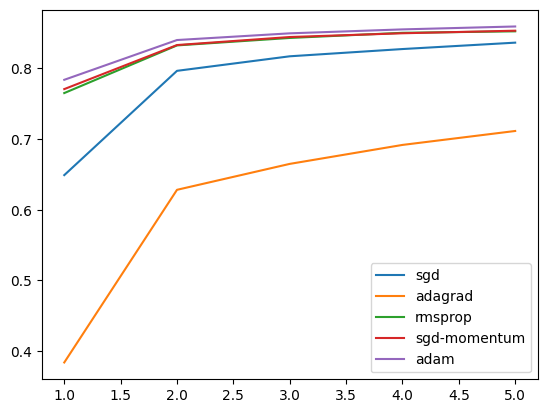

In [ ]:
# 옵티마이저 종류별로 비교해보자.
# 세로 : 점수 acc
# 가로 : 학습한 갯수 epochs
opt_list = ["sgd", "adagrad", "rmsprop", "sgd-momentum", "adam"]

for idx, result in enumerate(result_list):
    epochs = range(1, len(result.history["acc"]) + 1)

    plt.plot(epochs, result.history["acc"], label=opt_list[idx])

plt.legend()
plt.show()